## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
# nvidia-smi

In [2]:
import os
import keras
from sklearn import preprocessing 

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x):
    # x = x / 255
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
    x = min_max_scaler.fit_transform(x.reshape((len(x), -1)))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16, 8]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0804 14:06:25.775797 13892 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 14:06:25.791755 13892 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 14:06:25.794715 13892 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0804 14:06:25.921047 13892 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 14:06:25.928064 13892 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0804 14:06:26.025801 13892 deprecation.py:323] From D:\Software\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0804 14:06:26.093586 13892 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 146us/step - loss: 2.0163 - acc: 0.2552 - val_loss: 1.8552 - val_acc: 0.3177
Epoch 2/100
50000/50000 [==============================] - 4s 85us/step - loss: 1.7303 - acc: 0.3679 - val_loss: 1.6355 - val_acc: 0.4126
Epoch 3/100
50000/50000 [==============================] - 4s 85us/step - loss: 1.5577 - acc: 0.4405 - val_loss: 1.5594 - val_acc: 0.4429
Epoch 4/100
50000/50000 [==============================] - 4s 84us/step - loss: 1.4548 - acc: 0.4805 - val_loss: 1.5064 - val_acc: 0.4732
Epoch 5/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.3675 - acc: 0.5124 - val_loss: 1.4713 - val_acc: 0.4816
Epoch 6/100
50000/50000 [==============================] - 5s 97us/step - loss: 1.2867 - acc: 0.5396 - val_loss: 1.4591 - val_acc: 0.4970
Epoch 7/100
50000/50000 [==============================] - 5s 96us/step - loss: 1.2138 - acc: 0.5667 - val_loss: 1.4413 -

50000/50000 [==============================] - 4s 84us/step - loss: 0.1439 - acc: 0.9525 - val_loss: 3.5560 - val_acc: 0.5157
Epoch 60/100
50000/50000 [==============================] - 4s 82us/step - loss: 0.1341 - acc: 0.9562 - val_loss: 3.7929 - val_acc: 0.5137
Epoch 61/100
50000/50000 [==============================] - 4s 81us/step - loss: 0.0864 - acc: 0.9710 - val_loss: 3.8728 - val_acc: 0.5181
Epoch 62/100
50000/50000 [==============================] - 4s 82us/step - loss: 0.1263 - acc: 0.9592 - val_loss: 3.5419 - val_acc: 0.5209
Epoch 63/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.1165 - acc: 0.9626 - val_loss: 3.6990 - val_acc: 0.5123
Epoch 64/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.1117 - acc: 0.9634 - val_loss: 3.9024 - val_acc: 0.5127
Epoch 65/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.1058 - acc: 0.9652 - val_loss: 3.7816 - val_acc: 0.5199
Epoch 66/100
50000/50000 [==============

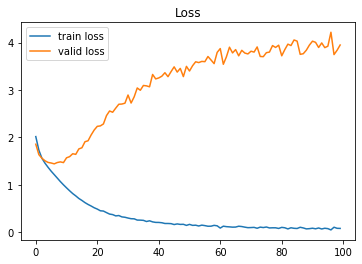

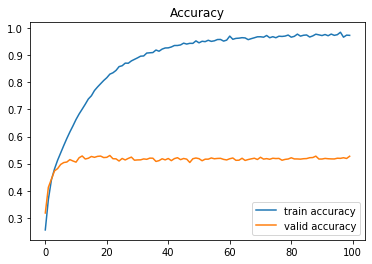

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()